## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Walkthrough

In [1]:
import os
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __load the default config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json') # load the default 
params = ExMAS.utils.make_paths(params)

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [5]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [6]:
inData = ExMAS.utils.generate_demand(inData, params)

### run

02-11-22 01:16:02-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
02-11-22 01:16:02-INFO-creating combinations
02-11-22 01:16:02-INFO-39800	 nR*(nR-1)
02-11-22 01:16:02-INFO-10876	departure compatibility
02-11-22 01:16:02-INFO-5403	origins shareability
02-11-22 01:16:02-INFO-1245	utility for i
02-11-22 01:16:02-INFO-382	utility for j
02-11-22 01:16:02-INFO-241	LIFO pairs
02-11-22 01:16:02-INFO-Reduction of feasible pairs by 99.39%


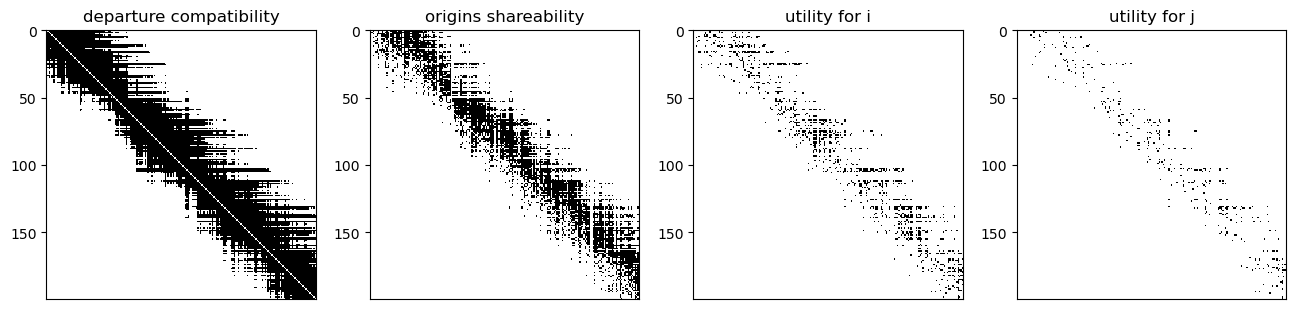

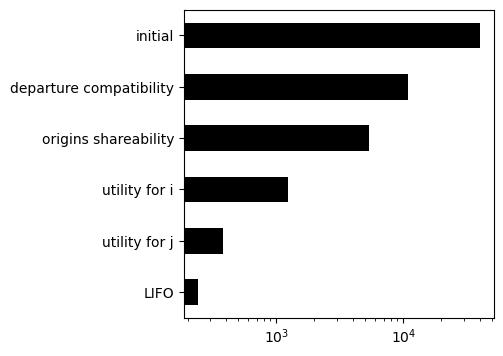

02-11-22 01:16:03-INFO-Degree 2 	Completed
02-11-22 01:16:03-INFO-trips to extend at degree 2 : 623
02-11-22 01:16:03-INFO-At degree 2 feasible extensions found out of 113 searched
02-11-22 01:16:03-INFO-Degree 3 	Completed
02-11-22 01:16:03-INFO-trips to extend at degree 3 : 113
02-11-22 01:16:03-INFO-At degree 3 feasible extensions found out of 13 searched
02-11-22 01:16:03-INFO-Degree 4 	Completed
02-11-22 01:16:03-INFO-trips to extend at degree 4 : 13
02-11-22 01:16:03-INFO-At degree 4 feasible extensions found out of 0 searched
02-11-22 01:16:03-INFO-Degree 5 	Completed
02-11-22 01:16:03-INFO-No more trips to exted at degree 5
02-11-22 01:16:03-INFO-Matching 200 trips to 949 rides in order to min u_veh


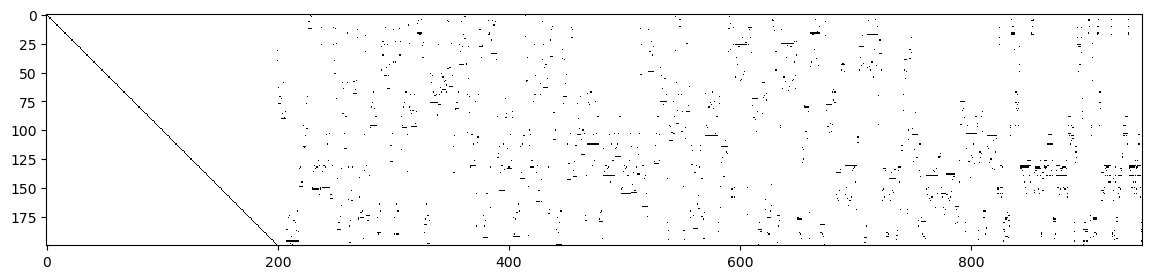

02-11-22 01:16:04-INFO-Problem solution: Optimal. 
Total costs for single trips:         70,385 
reduced by matching to:               54,373
02-11-22 01:16:04-INFO-Calculations  completed
02-11-22 01:16:04-INFO-DotMap(VehHourTrav=53758, VehHourTrav_ns=70385, PassHourTrav=80302, PassHourTrav_ns=70385, PassUtility=1039.51255, PassUtility_ns=1092.0190000000002, mean_lambda=0.29811953081362874, revenue_s=73904.25, revenue_ns=105577.5, Fare_Discount=-0.3, nR=200, SINGLE=69, PAIRS=41, TRIPLES=15, QUADRIPLES=1, QUINTETS=0, PLUS5=0, shared_ratio=0.655, fleet_size_nonshared=28.0, fleet_size_shared=20.0, lambda_shared=0.29811953081362874)


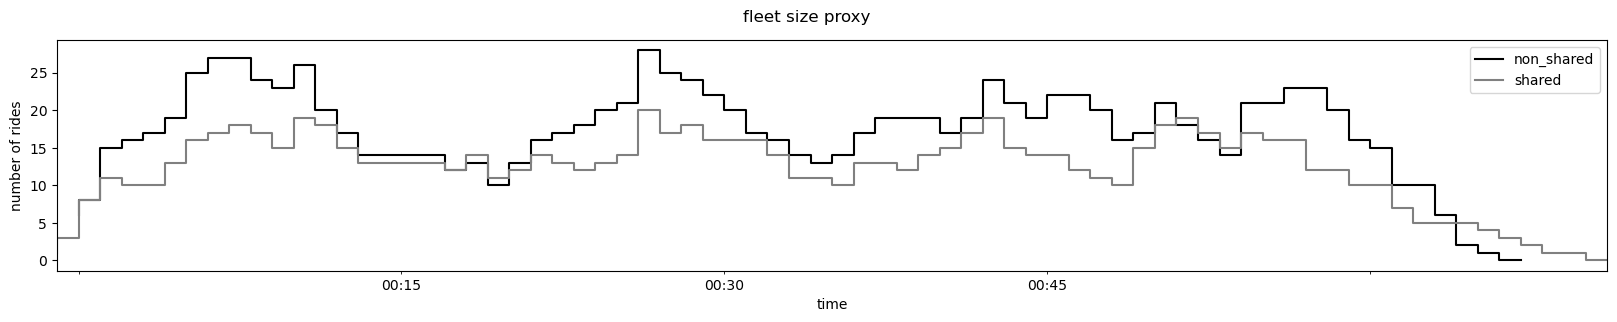

In [7]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [8]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

,KPI,description
VehHourTrav,53758,total travel time of vehicles (with travellers...
VehHourTrav_ns,70385,as above yet in non-shared scenarion
PassHourTrav,80302,total travel time of passengers
PassHourTrav_ns,70385,as above yet in non-shared scenarion
PassUtility,1039.51255,total (dis)utility of passengers
PassUtility_ns,1092.019,as above yet in non-shared scenarion
mean_lambda,0.29812,mean vehicle cost reduction (lambda) over shar...
revenue_s,73904.25,total fares paid by travellers sharing
revenue_ns,105577.5,as above yet in non-shared scenarion
Fare_Discount,-0.3,relative revenue reduction


 all feasible rides

In [9]:
inData.sblts.rides.sample(3)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,PassHourTrav_ns,row,selected
465,"[103, 121]",15.696800,1122,20,"[10.130924999999998, 5.565874999999999]","[1643.5, 734, 73, 300]","[103, 121]","[103, 121]",2.0,465,1060,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
481,"[194, 179]",17.392200,861,20,"[7.471975, 9.920224999999999]","[3279.5, 104, 492, 250]","[194, 179]","[194, 179]",2.0,481,1176,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
843,"[132, 131, 133]",22.844675,960,32,"[7.4285749999999995, 9.321024999999999, 6.095075]","[2376.5, 76, 205, 313, 156, 210]","[132, 131, 133]","[132, 133, 131]",NaN,843,1638,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


ride 

In [12]:
ride =inData.sblts.rides.sample(1).T
print(ride)
print(ExMAS.utils.rides_DESCRIPTIONS)
ride['d'] = ExMAS.utils.rides_DESCRIPTIONS
ride.columns = ['ride', 'description']
ride


                                                               271
indexes                                                 [141, 158]
u_pax                                                      4.25355
u_veh                                                          266
kind                                                            20
u_paxes                             [2.3535749999999998, 1.899975]
times                                        [2625.5, 127, 51, 73]
indexes_orig                                            [141, 158]
indexes_dest                                            [141, 158]
degree                                                         2.0
index                                                          271
PassHourTrav_ns                                                281
row              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
selected                                                         1
['travellers indexes', 'total (dis)utility of travellers (eq. 

ValueError: Length of values (14) does not match length of index (13)

selected rides in the solution

In [13]:
inData.sblts.schedule.sample(5)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,PassHourTrav_ns,row,selected
87,[87],5.25600,339,1,[5.256],"[1537, 339]",[87],[87],1,87,339,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
165,[165],3.24850,209,1,[3.2485],"[3006, 209]",[165],[165],1,165,209,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
171,[171],9.98950,644,1,[9.9895],"[3081, 644]",[171],[171],1,171,644,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
161,[161],2.46750,159,1,[2.4675000000000002],"[2870, 159]",[161],[161],1,161,159,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
246,"[156, 159]",5.87125,346,20,"[2.9660749999999996, 2.905175]","[2767.5, 87, 148, 96]","[156, 159]","[156, 159]",2,246,422,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


trips with parameters of the shared ride

In [14]:
inData.sblts.requests

,index,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,VoT,delta,u,u_PT,ride_id,ttrav_sh,u_sh,kind,position
0,168,1569646643,44817439,0,NaN,279,2022-11-02 15:07:24,NaN,2238,168,0.0035,156.956044,4.3335,999999,313,350,3.962875,20,0
1,14,1435362459,479575361,16,NaN,329,2022-11-02 15:14:18,NaN,2636,14,0.0035,184.780220,5.1055,999999,414,452,4.879000,20,0
2,128,2323108577,1571088224,32,NaN,452,2022-11-02 15:30:55,NaN,3617,128,0.0035,253.417582,7.0075,999999,591,452,6.261675,21,1
3,77,1569646491,1552650415,34,NaN,193,2022-11-02 14:56:27,NaN,1547,77,0.0035,108.461538,2.9960,999999,3,193,2.996000,1,0
4,48,1583999595,1413910858,44,NaN,306,2022-11-02 15:11:41,NaN,2451,48,0.0035,171.791209,4.7475,999999,548,331,4.163775,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7,2381861262,3377240345,3446,NaN,287,2022-11-02 16:05:54,NaN,2302,7,0.0035,161.439560,4.4575,999999,924,364,4.164300,32,2
196,188,4300758655,44720720,3485,NaN,388,2022-11-02 16:20:00,NaN,3109,188,0.0035,217.945055,6.0215,999999,211,423,5.696425,20,1
197,37,44768035,44804961,3507,NaN,244,2022-11-02 16:01:10,NaN,1957,37,0.0035,137.241758,3.7895,999999,262,261,3.449425,20,1
198,198,1552650605,267538410,3521,NaN,451,2022-11-02 16:28:59,NaN,3612,198,0.0035,253.153846,6.9965,999999,211,493,6.474825,20,0


In [15]:
trip =inData.sblts.requests.sample(1).T
trip['d'] = ExMAS.utils.trips_DESCRIPTIONS
trip.columns = ['ride', 'description']
trip

,ride,description
index,147,id
origin,4017942937,origin node (OSM index)
destination,44841563,destination node (OSM index)
treq,927,desired departure time
tdep,NaN,"[deprecated, from MaaSSim]"
ttrav,172,travel time [s] (shortest)
tarr,2022-11-02 15:08:32,desired arrival time (pd.datetime)
tdrop,NaN,"[deprecated, from MaaSSim]"
dist,1379,distance in meters (shortest)
pax_id,147,id


---
(c) Rafał Kucharski, Delft, 2020